# Data analysis 2

# 1 Importing libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import random as rd


from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings
import random
import pickle
from tqdm import tqdm

warnings.filterwarnings('ignore')

# 2 Exploratory data analysis.

## 2.1 dataset with information about films.


In [2]:
movies_data = pd.read_csv("../input/movielens-20m-dataset/movie.csv")
print("The size of dataset is", movies_data.shape)
movies_data.head()

The size of dataset is (27278, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


**Let's extract the year from the "title"**

In [3]:
movies_data["year_shot"] = movies_data["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)+$", x)))
movies_data.head()

,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [4]:
movies_data.isnull().sum()

movieId      0
title        0
genres       0
year_shot    0
dtype: int64

In [6]:
# Let's have a look at the unique years. We see that some films don't have the year
movies_data["year_shot"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '', '1917', '2005', '2006', '1902', '1903', '2007',
       '2008', '2009', '1912', '2010', '1913', '2011', '1898', '1899',
       '1894', '2012', '1909', '1910', '1901', '1893', '2013', '1896',
  

In [5]:
movies_data[movies_data["year_shot"] == ""]
print("-------")
print("The number with blanks in 'year' -", len(movies_data[movies_data["year_shot"] == ""]))

-------
The number with blanks in 'year' - 51


In [8]:
mask = movies_data["year_shot"] == ""
movies_data.loc[mask, "year_shot"] = movies_data[mask]["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)", x)))

In [9]:
movies_data[movies_data["year_shot"] == ""]
print("-------")
print("The number with blanks in 'year' -", len(movies_data[movies_data["year_shot"] == ""]))

-------
The number with blanks in 'year' - 22


In [10]:
movies_data.loc[movies_data["year_shot"] == "", "year_shot"] = np.nan

In [11]:
movies_data[movies_data["year_shot"].isna()]

,movieId,title,genres,year_shot
10593,40697,Babylon 5,Sci-Fi,NaN
15646,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
17341,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,NaN
22368,107434,Diplomatic Immunity (2009– ),Comedy,NaN
22669,108548,"Big Bang Theory, The (2007-)",Comedy,NaN
22679,108583,Fawlty Towers (1975-1979),Comedy,NaN
23617,112406,Brazil: In the Shadow of the Stadiums,Documentary,NaN
23824,113190,Slaying the Badger,Documentary,NaN
24286,115133,Tatort: Im Schmerz geboren,Crime,NaN
24412,115685,National Theatre Live: Frankenstein,Drama|Fantasy,NaN


**We see that there are some blanks in "year". I'll delete these rows as their amount is not huge.**

In [12]:
# convert "year" to numeric
mask1 = (~movies_data["year_shot"].isna())
movies_data.loc[mask1, "year_shot"] = movies_data.loc[mask1, "year_shot"].astype(int)

year_shot
1891    AxesSubplot(0.125,0.125;0.775x0.755)
1893    AxesSubplot(0.125,0.125;0.775x0.755)
1894    AxesSubplot(0.125,0.125;0.775x0.755)
1895    AxesSubplot(0.125,0.125;0.775x0.755)
1896    AxesSubplot(0.125,0.125;0.775x0.755)
                        ...                 
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_shot, Length: 118, dtype: object

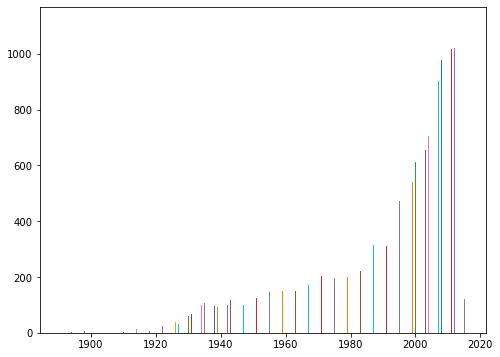

In [13]:
movies_data.groupby("year_shot")["year_shot"].hist(grid=False ,figsize=(8, 6))

In [14]:
movies_data.head()

,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [15]:
movies_data.groupby("year_shot")["movieId"].count()

year_shot
1891       1
1893       1
1894       2
1895       2
1896       2
        ... 
2011    1016
2012    1022
2013    1011
2014     740
2015     120
Name: movieId, Length: 118, dtype: int64

## 2.2 dataset with information about ratings


In [16]:
ratings_data = pd.read_csv("../input/movielens-20m-dataset/rating.csv")
print("The size of dataset is", ratings_data.shape)
ratings_data.head()

The size of dataset is (20000263, 4)


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [17]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [18]:
ratings_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [19]:
# Let's have a look at the unique number of users
ratings_data[["userId"]].nunique() 

userId    138493
dtype: int64

**Before we begin to do manipulation with this dataset I cut some users in order to do calculations faster**

In [6]:
random.seed(0)
special_users = random.sample(list(ratings_data["userId"]), 800)
print(len(special_users))

NameError: name 'ratings_data' is not defined

In [21]:
special_ratings_data = ratings_data[ratings_data["userId"].isin(special_users)]
print(special_ratings_data.shape)
special_ratings_data.head()

(398976, 4)


,userId,movieId,rating,timestamp
2302,22,1,3.0,2001-07-09 00:22:37
2303,22,6,5.0,2001-07-09 00:29:33
2304,22,16,5.0,2001-07-09 00:23:48
2305,22,47,4.0,2001-07-09 00:21:17
2306,22,50,4.0,2001-07-09 00:19:39


In [22]:
# convert time to more convenient format
special_ratings_data["date"] =  pd.to_datetime(special_ratings_data.timestamp).dt.date # переведем Unix время в удобный для нас формат
special_ratings_data.head()

,userId,movieId,rating,timestamp,date
2302,22,1,3.0,2001-07-09 00:22:37,2001-07-09
2303,22,6,5.0,2001-07-09 00:29:33,2001-07-09
2304,22,16,5.0,2001-07-09 00:23:48,2001-07-09
2305,22,47,4.0,2001-07-09 00:21:17,2001-07-09
2306,22,50,4.0,2001-07-09 00:19:39,2001-07-09


<AxesSubplot:>

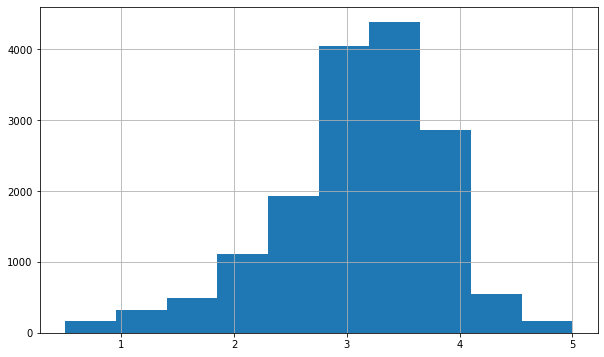

In [23]:
# distribution of mean rating
special_ratings_data.groupby("movieId").rating.mean().hist(figsize=(10, 6)) 

Total number of people 790
People with 2 or more unique days 557


Text(0, 0.5, 'Number of users')

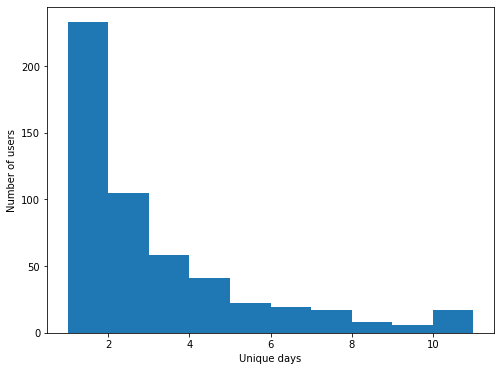

In [24]:
# let's see how many unique days each person watched movies
unique_days = special_ratings_data[["userId", "date"]].groupby("userId")["date"].nunique().to_frame()
print("Total number of people", len(unique_days))
print("People with 2 or more unique days", len(unique_days[unique_days["date"] > 1]))
special_ratings_data[["userId", "date"]].groupby("userId")["date"].nunique().hist(grid=False, bins=range(1, 12), figsize=(8, 6))

plt.xlabel("Unique days")
plt.ylabel("Number of users")

In [25]:
# let's see how many films are watched by a user in one day
special_ratings_data[["userId", "date", "movieId"]].groupby(["userId", "date"])["movieId"].nunique()


userId  date      
22      2001-07-09    133
72      2007-12-31     84
77      2012-07-04    100
295     1997-05-18    324
377     1997-05-24    199
                     ... 
138325  2012-09-05     43
        2012-09-07     18
        2012-10-15     59
        2012-10-16     22
        2012-11-09     20
Name: movieId, Length: 35745, dtype: int64

# 3 Feature engineering.

In [26]:
special_ratings_data.drop("timestamp", axis=1, inplace=True)
special_ratings_data.head()

,userId,movieId,rating,date
2302,22,1,3.0,2001-07-09
2303,22,6,5.0,2001-07-09
2304,22,16,5.0,2001-07-09
2305,22,47,4.0,2001-07-09
2306,22,50,4.0,2001-07-09


In [27]:
# delete those films where we have Nan in the "year"
special_ratings_data = special_ratings_data[~(special_ratings_data["movieId"].isin(movies_data[movies_data["year_shot"].isna()]["movieId"]))]
print(special_ratings_data.shape)
special_ratings_data.head()

(398962, 4)


,userId,movieId,rating,date
2302,22,1,3.0,2001-07-09
2303,22,6,5.0,2001-07-09
2304,22,16,5.0,2001-07-09
2305,22,47,4.0,2001-07-09
2306,22,50,4.0,2001-07-09


In [28]:
movies_data = movies_data[~(movies_data["year_shot"].isna())]
print(movies_data.shape)
movies_data.head()

(27256, 4)


,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [29]:
np.sort(movies_data["year_shot"].unique())

array([1891, 1893, 1894, 1895, 1896, 1898, 1899, 1900, 1901, 1902, 1903,
       1905, 1909, 1910, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=object)

**Split the "genre" column in movies_data dataset**

In [30]:
movies_data["genres_list"] = movies_data["genres"].str.split("|")
movies_data.head()

,movieId,title,genres,year_shot,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]


In [31]:
# convert the "genres_list columns" to pd.Series in order to extract genres from the lists to seperate columns
genres_list_to_series = pd.Series(movies_data.genres_list)
genres_list_to_series.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres_list, dtype: object

In [32]:
# for exploding lists we will use MultiLabelBinarizer()
m1b = MultiLabelBinarizer()
one_hot_genres = pd.DataFrame(m1b.fit_transform(genres_list_to_series), columns=m1b.classes_)
one_hot_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
one_hot_genres.isnull().sum()

(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

**Let's see how many films have "no genres listed"**

In [34]:
print("The amount of films without genres - ",len(one_hot_genres[one_hot_genres["(no genres listed)"]==1]))

The amount of films without genres -  237


In [35]:
print("The percentage of films which don't have genres", round(len(one_hot_genres[one_hot_genres["(no genres listed)"]==1])/len(one_hot_genres) * 100), "%")

The percentage of films which don't have genres 1 %


**Concat the dataframe with seperate genres with the main dataframe**

In [37]:
movies_data_concat = pd.concat([movies_data.reset_index(drop=True), one_hot_genres.reset_index(drop=True)], axis=1)
movies_data_concat.head()

,movieId,title,genres,year_shot,genres_list,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]",0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
movies_data_concat.isnull().sum()

movieId               0
title                 0
genres                0
year_shot             0
genres_list           0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [39]:
movies_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27256 entries, 0 to 27255
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             27256 non-null  int64 
 1   title               27256 non-null  object
 2   genres              27256 non-null  object
 3   year_shot           27256 non-null  object
 4   genres_list         27256 non-null  object
 5   (no genres listed)  27256 non-null  int64 
 6   Action              27256 non-null  int64 
 7   Adventure           27256 non-null  int64 
 8   Animation           27256 non-null  int64 
 9   Children            27256 non-null  int64 
 10  Comedy              27256 non-null  int64 
 11  Crime               27256 non-null  int64 
 12  Documentary         27256 non-null  int64 
 13  Drama               27256 non-null  int64 
 14  Fantasy             27256 non-null  int64 
 15  Film-Noir           27256 non-null  int64 
 16  Horror              27

# 4 Splitting to train and test datasets

We will split our data to global train(for training the RL model) and global test(for testing the results of RL model).

**For more clarity**

In [40]:
# let's see how many films each person has in the dataframe
number_movies = special_ratings_data[["userId", "movieId"]].groupby("userId")["movieId"].count().\
                to_frame().reset_index().rename(columns={"movieId": "number_of_movies"})
print("Total number of people", len(number_movies))
print("Max value of movies watched - ", number_movies["number_of_movies"].max())
print("Min value of movies watched - ", number_movies["number_of_movies"].min())
print("Mean value of the number watched movies - ", number_movies["number_of_movies"].mean())
number_movies.head()

Total number of people 790
Max value of movies watched -  5329
Min value of movies watched -  20
Mean value of the number watched movies -  505.01518987341774


,userId,number_of_movies
0,22,133
1,72,84
2,77,100
3,295,324
4,377,199


<AxesSubplot:xlabel='number_of_movies'>

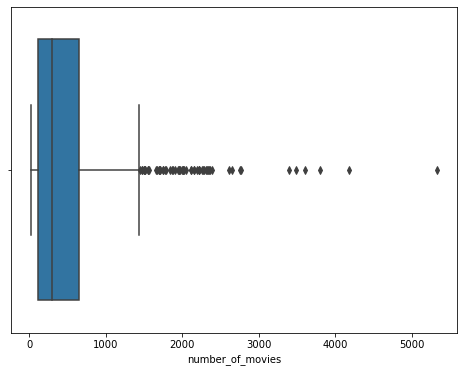

In [41]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x=number_movies["number_of_movies"])

As we don't have the true time when a movie was watched it's hard to generate good recommendations. I mean if we had the time we would cut the last n-days to the test set and try to predict recommendations based on other days. We would simulate the real situation by splitting the initial data in such way.

So I suggest to get rid of users which have less than 100 movies watched, after that to cut 50 movies for test and the rest for train.

In [42]:
final_users = number_movies[number_movies["number_of_movies"] >= 100]
print(final_users.shape)
final_users.head()

(628, 2)


,userId,number_of_movies
0,22,133
2,77,100
3,295,324
4,377,199
6,572,1325


In [43]:
final_ratings = special_ratings_data[special_ratings_data["userId"].isin(final_users["userId"])]
print(final_ratings.shape)
final_ratings.head()

(389572, 4)


,userId,movieId,rating,date
2302,22,1,3.0,2001-07-09
2303,22,6,5.0,2001-07-09
2304,22,16,5.0,2001-07-09
2305,22,47,4.0,2001-07-09
2306,22,50,4.0,2001-07-09


## Global train-test

In [44]:
# forming test dataset
for_test = []
for user in final_ratings["userId"].unique():
    for_test.append(final_ratings[final_ratings["userId"] == user].iloc[-50:])
global_test = pd.concat(for_test, ignore_index=True)
print(global_test.shape)
global_test.head()

(31400, 4)


,userId,movieId,rating,date
0,22,2617,4.0,2001-07-09
1,22,2640,4.0,2001-07-09
2,22,2641,3.0,2001-07-09
3,22,2642,3.0,2001-07-09
4,22,2643,2.0,2001-07-09


In [45]:
global_train = pd.merge(final_ratings,global_test, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
print(global_train.shape)
global_train.head()

(358172, 4)


,userId,movieId,rating,date
0,22,1,3.0,2001-07-09
1,22,6,5.0,2001-07-09
2,22,16,5.0,2001-07-09
3,22,47,4.0,2001-07-09
4,22,50,4.0,2001-07-09


We will make recoms only for warm users. To get more information about cold-start problem in recommender systems read [this](https://www.quora.com/What-are-cold-start-and-warm-start-in-recommendation-systems)

In [46]:
# let's check if all users from test dataset are in train
all(global_test["userId"].isin(global_train["userId"]))

True

# Next Lecture: Creating a model 